2. Grafique w(t) = z(t)*r(2(t + k) - 6) Con k = 2(a+1) con a = último número de la cédula
(10%)

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10
segundos de la señal usando Colab (10%)



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
t=np.linspace(0,1,1000)
señal=4*np.cos(8*np.pi*t + np.pi/4) + 2*(3+1)*np.sin(40*np.pi*t)+5
fs = 100

In [66]:
señal.size

1000

In [67]:
duration=señal.size/fs
duration

10.0

In [68]:
time_vector=np.arange(0,duration,1/fs)
time_vector.shape

(1000,)

Text(0, 0.5, 'Amplitud')

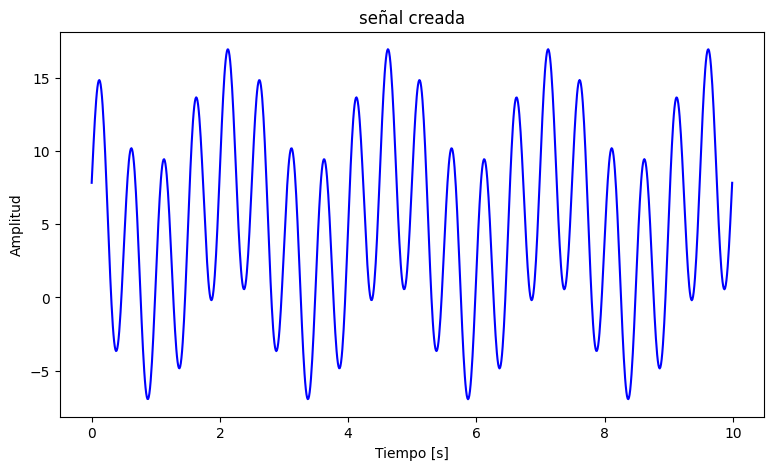

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('señal creada')
plt.plot(time_vector, señal, color='blue')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

5. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función
que:

In [70]:
from scipy.signal import welch

In [71]:
def periodograma (senal_c_c4):
  fs = 100 # Frecuencia de muestreo de la señal EEG
  nperseg = 40 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
  noverlap = int(nperseg / 20)  # Solapamiento de las ventanas del 50%
  ventana = np.bartlett(nperseg)  # Ventana Hanning
  # Calcular el periodograma de Welch
  f_control, pxx_control = welch(senal_c_c4, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)


  # Se grafica frecuencia vs potencia
  plt.figure(figsize=(20,5))
  plt.stem(f_control, pxx_control, linefmt='blue')
  plt.ylabel('Potencia')
  plt.xlabel('Frecuencia (Hz)')
  plt.title("Periodograma de Welch - sujeto control")
  plt.show()

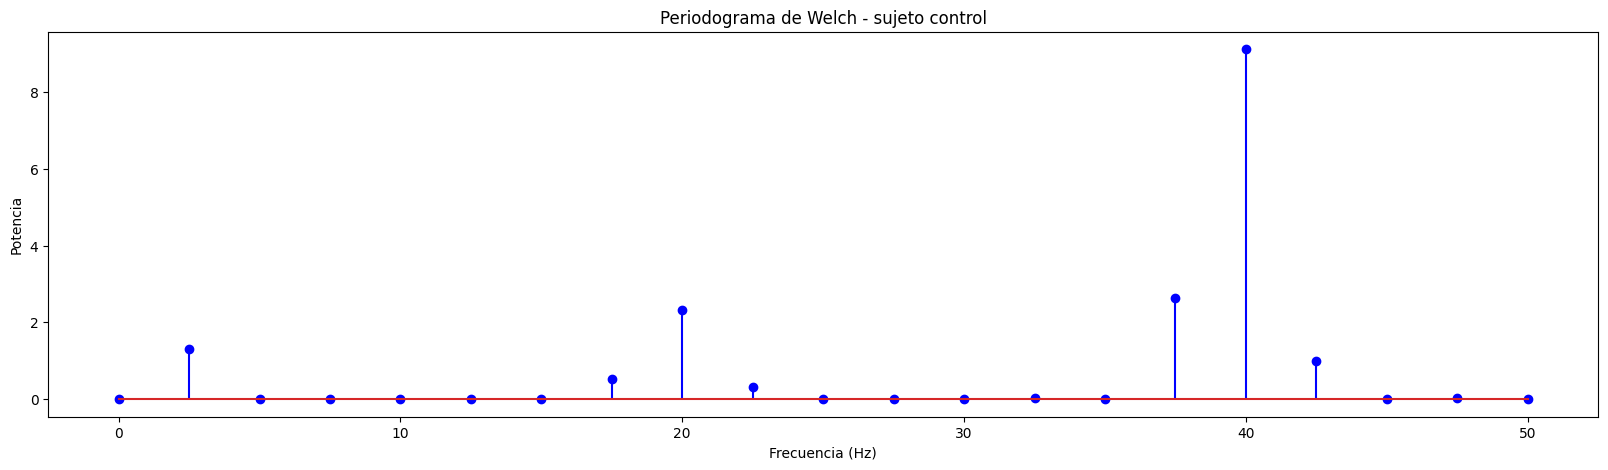

In [64]:
periodograma (señal)

7. Una señal fisiológica definida en el rango entre a Hz y b Hz se toma con frecuencia de muestreo
de 100 Hz. Para esta señal:

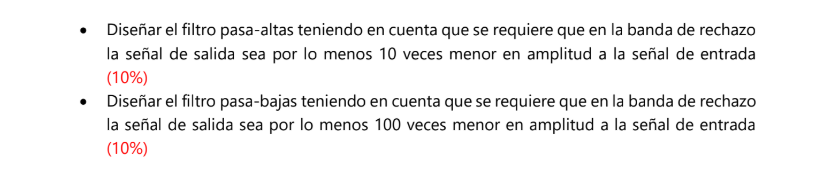

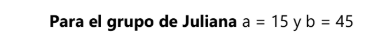

**Pasa-Altas**

In [42]:
import scipy.signal as signal

In [72]:
def freqz_highpass(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """
    Fc1N=5/100
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));
    plt.figure(figsize=(20,4));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.xlim(0, 0.2)
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.axvline(x=Fc1N, color='r', linestyle='--', label='Fc normalizada = 0.002')
    plt.legend()
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.xlim(0, 0.2)
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.axvline(x=Fc1N, color='r', linestyle='--', label='Fc normalizada = 0.002')
    plt.legend()
    plt.grid(True)
    plt.grid(True)
    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<Figure size 1500x500 with 0 Axes>

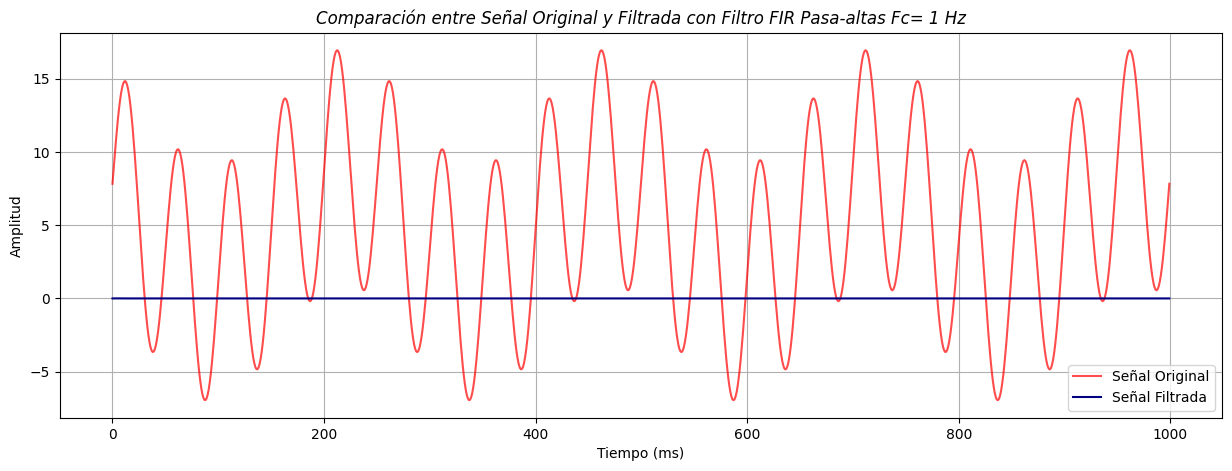

In [73]:
# Filtro pasa-altas con ancho de banda de 1 Hz y orden 450, usando ventana Rectangular.

plt.figure(figsize=(15, 5))

Fs = 100 # Frecuencia de muestreo

order =66  # Orden

Fc1 = 5  # Frecuencia de corte

nyquist = Fs / 2  # Frecuencia de Nyquist

wn_hr = Fc1/nyquist # Frecuencia de corte normalizada respecto nyquist

highpass_1r = signal.firwin(order+1,wn_hr, pass_zero = 'highpass',window='hamming') # Filtro usando ventana rectangular

FIR_highpass1r = signal.filtfilt(b=highpass_1r,a=1,x=señal) # Aplicación del filtro

# Se grafica la señal original y la filtrada

plt.figure(figsize=(15, 5))
plt.plot(señal, label='Señal Original', color='red', alpha=0.7)  # Señal original
plt.plot(FIR_highpass1r , label='Señal Filtrada', color='navy')  # Señal filtrada

plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud")
plt.title("Comparación entre Señal Original y Filtrada con Filtro FIR Pasa-altas Fc= 1 Hz", fontstyle='italic')
plt.grid()
plt.legend() # Se muestra la leyenda
plt.show()

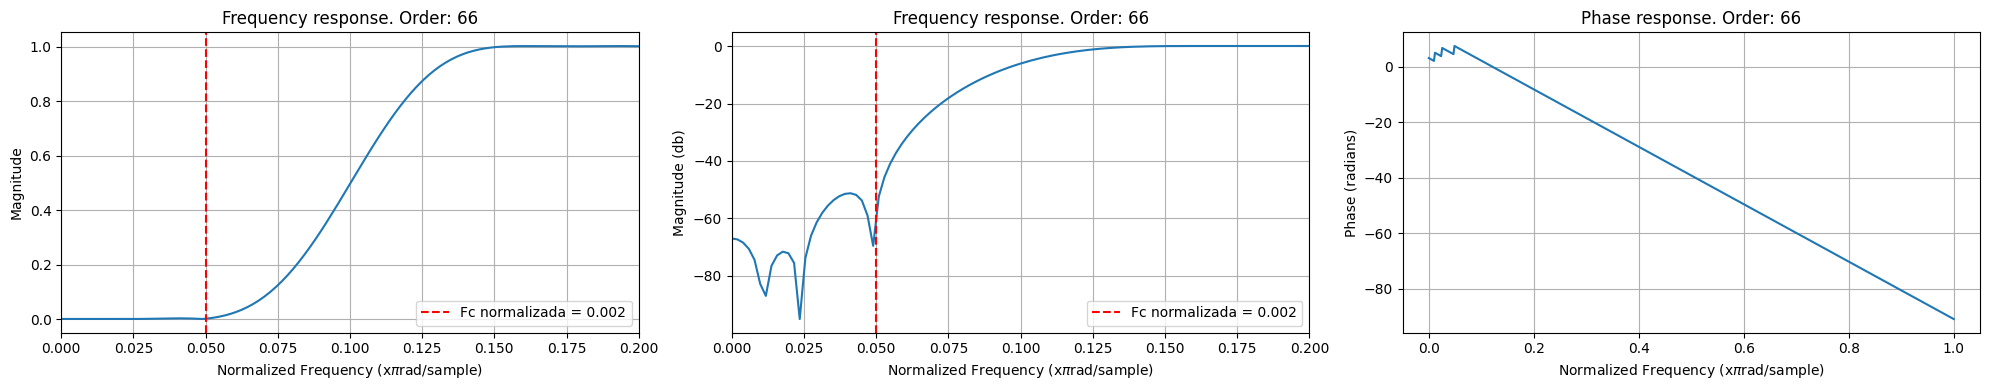

In [76]:
freqz_highpass(highpass_1r ,1,66)

**Pasa-Bajas**

In [77]:
def freqz_lowpass(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """
    Fc2N=50/100
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));
    plt.figure(figsize=(20,4));
    plt.subplot(131);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.axvline(x=Fc2N, color='r', linestyle='--', label='Fc normalizada = 0.1')
    plt.legend()
    [xmin, xmax, ymin, ymax] = plt.axis();
    plt.grid(True);

    plt.subplot(132);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.axvline(x=Fc2N, color='r', linestyle='--', label='Fc normalizada = 0.1  ')
    plt.legend()
    plt.grid(True)
    plt.grid(True)
    plt.subplot(133);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<Figure size 1500x500 with 0 Axes>

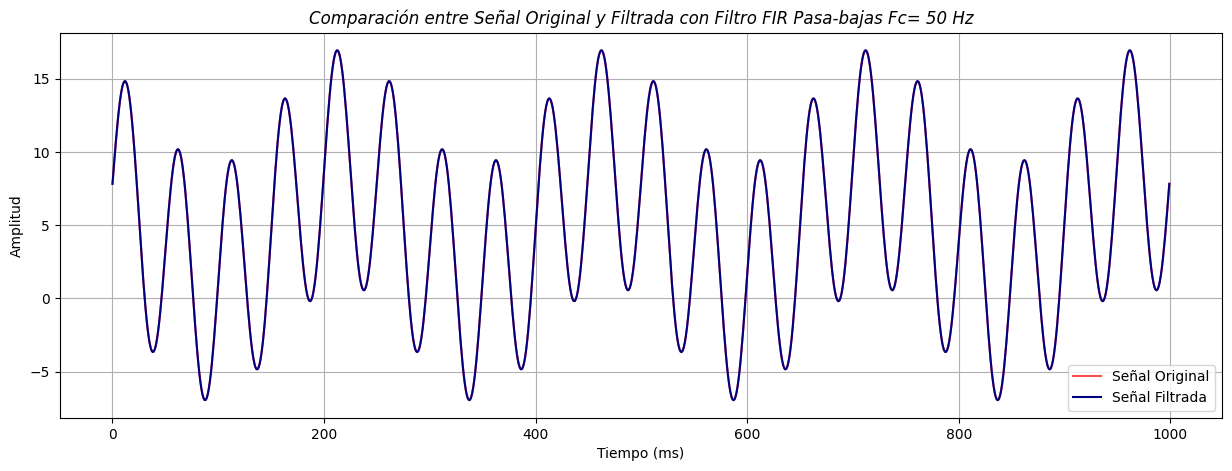

In [84]:
# Filtro pasa-bajas con ancho de banda de 50 Hz y orden 9, usando ventana Rectangular

plt.figure(figsize=(15, 5))

Fs = 100  # Frecuencia de muestreo

orderlow = 7  # Orden

Fc2 = 45  # Frecuencia de corte

nyquist = Fs / 2  # Frecuencia de Nyquist

wn_lr = Fc2/nyquist # Frecuencia de corte normalizada respecto nyquist

lowpass_1r = signal.firwin(orderlow+1,wn_lr, pass_zero = 'lowpass',window='hamming') # Filtro usando ventana rectangular

FIR_lowpass1r = signal.filtfilt(b=lowpass_1r,a=1,x=señal) # Aplicación del filtro

# Se grafica la señal original y la filtrada

plt.figure(figsize=(15, 5))
plt.plot(señal, label='Señal Original', color='red', alpha=0.7)  # Señal original
plt.plot(FIR_lowpass1r , label='Señal Filtrada', color='navy')  # Señal filtrada

plt.xlabel("Tiempo (ms)")
plt.ylabel("Amplitud")
plt.title("Comparación entre Señal Original y Filtrada con Filtro FIR Pasa-bajas Fc= 50 Hz", fontstyle='italic')
plt.grid()
plt.legend() # Se muestra la leyenda
plt.show()

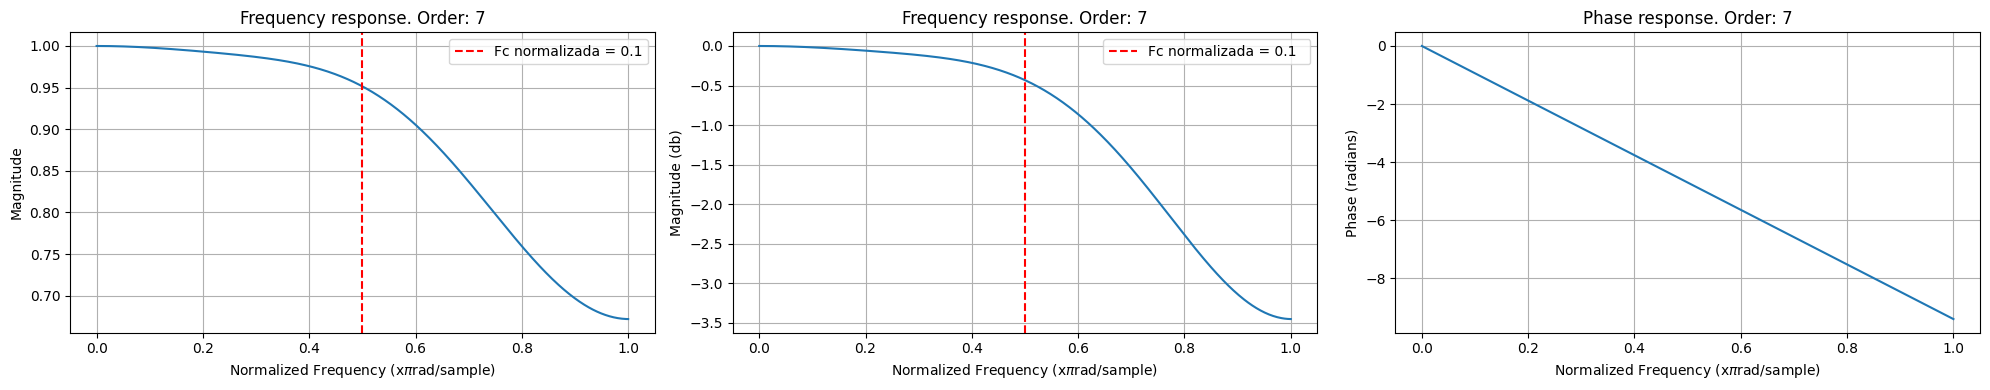

In [83]:
freqz_lowpass(lowpass_1r,1,7)